# Лабораторная работа 4. Алгоритмы на графах

**Цель работы:** изучение некоторых алгоритмов на графах; исследование эффективности этих алгоритмов.

### Задание 1

Найти кратчайший путь на графе между парами вершин методом динамического программирования вручную. (Найти кратчайший путь от 3 до 7).

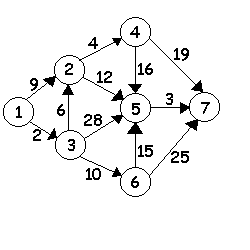

Начальные условия $f_3=0$, $S_{33} = 0$.

Находим последовательно значения функции $f_i$ (в условных единицах) для каждой вершины ориентированного графа:

$f_2 = \min(S_{23} + f_3) = 6 + f_3 = 6 + 0 = 6$;

$f_6 = \min(S_{63} + f_3) = 10 + f_3 = 10 + 0 = 10$;

$f_4 = \min(S_{42} + f_2) = 4 + f_2 = 4 + 6 = 10$;

$f_5 = \min 
\left(
  \begin{array}{c}
  S_{54} + f_4 \\
  S_{52} + f_2 \\
  S_{53} + f_3 \\
  S_{56} + f_6 \\
  \end{array}
\right) 
= 
\min 
\left(
  \begin{array}{c}
  16 + 10 \\
  12 + 6 \\
  28 + 0 \\
  15 + 10 \\
  \end{array}
\right) = 18$; 

$f_7 = \min 
\left(
  \begin{array}{c}
  S_{74} + f_4 \\
  S_{75} + f_5 \\
  S_{76} + f_6 \\
  \end{array}
\right)
= 
\min 
\left(
  \begin{array}{c}
  19 + 10 \\
  3 + 18 \\
  25 + 10 \\
  \end{array}
\right) = 21$; 

Длина кратчайшего пути составляет 21 условных единиц. 

---------------------------------------------------------------------------------------
Таким образом, получаем кратчайший путь от вершины 3 к вершине 7: ( 3 $\Rightarrow$ 2 $\Rightarrow$ 5 $\Rightarrow$ 7 )

### Задание 2

 Реализовать программно поиск кратчайшего пути на графе между парами вершин из задания 1 методом динамического программирования.

In [1]:
def shortest_way(graph):
    length = len(graph)
    dist = [[float('inf') for _ in range(length)] for _ in range(length)]

    for i in range(length):
        for j in range(length):
            if i == j:
                dist[i][j] = 0
            elif graph[i][j] != 0:
                dist[i][j] = graph[i][j]

    for k in range(length):
        for i in range(length):
            for j in range(length):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist


matrix = [[0, 9, 2, 0, 0,  0,  0],
         [0, 0, 0, 4, 12,  0,  0],
         [0, 6, 0, 0, 28, 10,  0],
         [0, 0, 0, 0, 16,  0, 19],
         [0, 0, 0, 0,  0,  0,  3],
         [0, 0, 0, 0, 15,  0, 25],
         [0, 0, 0, 0,  0,  0,  0]]


distances = shortest_way(matrix)
print(distances[2][6])

21


In [2]:
f_matrix = [0, 0, 0, 0, 0, 0, 0]

matrix = [[0, 9, 2, 0,  0,  0,  0],
          [0, 0, 0, 4, 12,  0,  0],
          [0, 6, 0, 0, 28, 10,  0],
          [0, 0, 0, 0, 16,  0, 19],
          [0, 0, 0, 0,  0,  0,  3],
          [0, 0, 0, 0, 15,  0, 25],
          [0, 0, 0, 0,  0,  0,  0]]

f_matrix[1] = f_matrix[2] + matrix[2][1] #это f2
f_matrix[3] = f_matrix[1] + matrix[1][3] #это f4
f_matrix[5] = f_matrix[2] + matrix[2][5] #это f6

f_matrix[4] = min(f_matrix[1] + matrix[1][4], f_matrix[2] + matrix[2][4], f_matrix[3] + matrix[3][4], f_matrix[5] + matrix[5][4])
f_matrix[6] = min(f_matrix[3] + matrix[3][6], f_matrix[4] + matrix[4][6], f_matrix[5] + matrix[5][6])

min_way = f_matrix[6]
print(min_way)

21


### Задание 3

Реализовать алгоритм Дейкстры поиска кратчайшего пути на графе между парами вершин (5, 7):

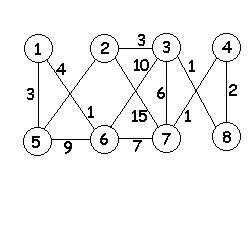

***Алгоритм Дейкстры***

In [5]:
import sys
 
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        
    def construct_graph(self, nodes, init_graph):
        '''
        Этот метод обеспечивает симметричность графика. Другими словами, если существует путь от узла A к B со значением V, должен быть путь от узла B к узлу A со значением V.
        '''
        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    
    def get_nodes(self):
        "Возвращает узлы графа"
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Возвращает соседей узла"
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Возвращает значение ребра между двумя узлами."
        return self.graph[node1][node2]

def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    # Мы будем использовать этот словарь, чтобы сэкономить на посещении каждого узла и обновлять его по мере продвижения по графику 
    shortest_path = {}
 
    # Мы будем использовать этот dict, чтобы сохранить кратчайший известный путь к найденному узлу
    previous_nodes = {}
 
    # Мы будем использовать max_value для инициализации значения "бесконечности" непосещенных узлов   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # Однако мы инициализируем значение начального узла 0  
    shortest_path[start_node] = 0
    
    # Алгоритм выполняется до тех пор, пока мы не посетим все узлы
    while unvisited_nodes:
        # Приведенный ниже блок кода находит узел с наименьшей оценкой
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # Приведенный ниже блок кода извлекает соседей текущего узла и обновляет их расстояния
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # После посещения его соседей мы отмечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
   # Добавить начальный узел вручную
    path.append(start_node)
    
    print("Найден следующий лучший маршрут с ценностью {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))


#проверка моего варианта

nodes = ["1", "2", "3", "4", "5", "6", "7", "8"]

init_graph = {}
for node in nodes:
    init_graph[node] = {}
    
init_graph["1"]["6"] = 4
init_graph["1"]["5"] = 3
init_graph["5"]["6"] = 9
init_graph["5"]["2"] = 1
init_graph["2"]["3"] = 3
init_graph["2"]["7"] = 15
init_graph["6"]["3"] = 10
init_graph["6"]["7"] = 7
init_graph["3"]["7"] = 6
init_graph["3"]["8"] = 1
init_graph["4"]["7"] = 1
init_graph["4"]["8"] = 2

graph = Graph(nodes, init_graph)

previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="5")
print_result(previous_nodes, shortest_path, start_node="5", target_node="7")

Найден следующий лучший маршрут с ценностью 8.
5 -> 2 -> 3 -> 8 -> 4 -> 7


### Задание 4

Реализовать прогрммно один из алгоритмов поиска кратчайшего пути на графе между парами вершин из задания 3.

***Алгоритм Беллмана — Форда***

In [15]:
class Graph:

    def __init__(self, vertices):
        self.V = vertices  
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def add_double_sided_edge(self, u, v, w):
        self.add_edge(u, v, w)
        self.add_edge(v, u, w)

    def bellman_ford(self, src, end):
        src -= 1
        dist = [float("Inf")] * self.V
        dist[src] = 0

        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        print(dist[end - 1])


g = Graph(8)
g.add_double_sided_edge(0, 5, 4)
g.add_double_sided_edge(0, 4, 3)
g.add_double_sided_edge(4, 5, 9)
g.add_double_sided_edge(4, 1, 1)
g.add_double_sided_edge(1, 2, 3)
g.add_double_sided_edge(1, 6, 15)
g.add_double_sided_edge(5, 2, 10)
g.add_double_sided_edge(5, 6, 7)
g.add_double_sided_edge(2, 6, 6)
g.add_double_sided_edge(2, 7, 1)
g.add_double_sided_edge(3, 6, 1)
g.add_double_sided_edge(3, 7, 2)

g.bellman_ford(5, 7)


8
